<a href="https://colab.research.google.com/github/Axel02leon/Intro-to-Machine-Learning-/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1
1.a Modify the training loop properly to accommodate this redefinition.

1.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

In [6]:
import torch
from torch.optim import SGD
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])

# Normalize t_u for better gradient updates
t_u_norm = (t_u - t_u.mean()) / t_u.std()

# Non-linear model
def nonlinear_model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

# Loss function
def loss_fn(t_p, t_c):
    return ((t_p - t_c) ** 2).mean()

# Training function
def train_nonlinear_model(epochs, learning_rate, t_u, t_c):
    # Initialize parameters
    w2 = torch.tensor(0.0, requires_grad=True)
    w1 = torch.tensor(0.0, requires_grad=True)
    b = torch.tensor(0.0, requires_grad=True)

    optimizer = SGD([w2, w1, b], lr=learning_rate)

    # Store loss values
    losses = []

    for epoch in range(epochs):
        # Predictions
        t_p = nonlinear_model(t_u, w2, w1, b)

        # Loss calculation
        loss = loss_fn(t_p, t_c)
        losses.append(loss.item())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss every 500 epochs
        if (epoch + 1) % 500 == 0:
            print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")

    return w2, w1, b, losses


In [3]:
# Train with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_params = None
best_loss = float('inf')

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    w2, w1, b, losses = train_nonlinear_model(epochs=5000, learning_rate=lr, t_u=t_u_norm, t_c=t_c)

    final_loss = losses[-1]
    print(f"Final loss for learning rate {lr}: {final_loss:.4f}")

    if final_loss < best_loss:
        best_loss = final_loss
        best_params = (w2, w1, b)


Training with learning rate: 0.1
Epoch 500, Loss: 2.0907
Epoch 1000, Loss: 2.0907
Epoch 1500, Loss: 2.0907
Epoch 2000, Loss: 2.0907
Epoch 2500, Loss: 2.0907
Epoch 3000, Loss: 2.0907
Epoch 3500, Loss: 2.0907
Epoch 4000, Loss: 2.0907
Epoch 4500, Loss: 2.0907
Epoch 5000, Loss: 2.0907
Final loss for learning rate 0.1: 2.0907

Training with learning rate: 0.01
Epoch 500, Loss: 2.0921
Epoch 1000, Loss: 2.0907
Epoch 1500, Loss: 2.0907
Epoch 2000, Loss: 2.0907
Epoch 2500, Loss: 2.0907
Epoch 3000, Loss: 2.0907
Epoch 3500, Loss: 2.0907
Epoch 4000, Loss: 2.0907
Epoch 4500, Loss: 2.0907
Epoch 5000, Loss: 2.0907
Final loss for learning rate 0.01: 2.0907

Training with learning rate: 0.001
Epoch 500, Loss: 27.0089
Epoch 1000, Loss: 8.1365
Epoch 1500, Loss: 3.8408
Epoch 2000, Loss: 2.6622
Epoch 2500, Loss: 2.2908
Epoch 3000, Loss: 2.1633
Epoch 3500, Loss: 2.1175
Epoch 4000, Loss: 2.1007
Epoch 4500, Loss: 2.0944
Epoch 5000, Loss: 2.0921
Final loss for learning rate 0.001: 2.0921

Training with learni

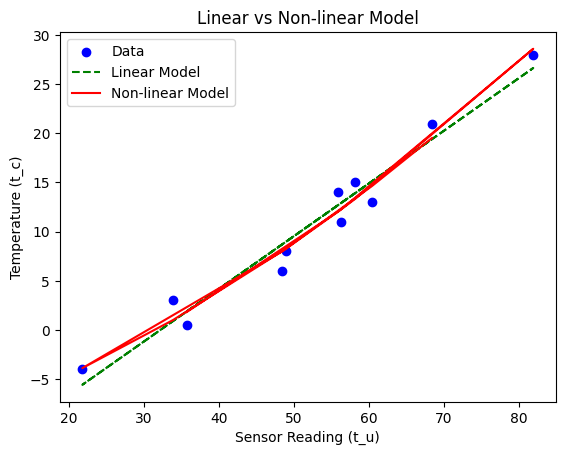

In [4]:
# Linear model
def linear_model(t_u, w, b):
    return w * t_u + b

def train_linear_model(epochs, learning_rate, t_u, t_c):
    # Initialize parameters
    w = torch.tensor(0.0, requires_grad=True)
    b = torch.tensor(0.0, requires_grad=True)

    optimizer = SGD([w, b], lr=learning_rate)

    for epoch in range(epochs):
        t_p = linear_model(t_u, w, b)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return w, b

# Train linear model
w, b = train_linear_model(epochs=5000, learning_rate=0.01, t_u=t_u_norm, t_c=t_c)

# Compare predictions
t_p_linear = linear_model(t_u_norm, w, b).detach()
t_p_nonlinear = nonlinear_model(t_u_norm, *best_params).detach()

# Plot
plt.scatter(t_u, t_c, label="Data", color="blue")
plt.plot(t_u, t_p_linear, label="Linear Model", color="green", linestyle="--")
plt.plot(t_u, t_p_nonlinear, label="Non-linear Model", color="red")
plt.xlabel("Sensor Reading (t_u)")
plt.ylabel("Temperature (t_c)")
plt.title("Linear vs Non-linear Model")
plt.legend()
plt.show()


# Problem 2
2.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

For this, you need to use the housing dataset. For training and validation use 80% (training) and 20% (validation) split. Identify the best parameters for your linear regression model, based on the above input variables. In this case, you will have six parameters:

2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per each training. Pick the best linear model.

2.c. Compare your results against the liner regression did in homework 1. Do you see meaningful differences?

In [7]:
url = "https://raw.githubusercontent.com/Axel02leon/Intro-to-Machine-Learning-/refs/heads/main/Homework_2/Housing.csv"
df = pd.read_csv(url)

In [8]:
features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X = df[features].values
y = df[target].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [9]:
# Define the model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = torch.nn.Linear(input_dim, 1)  # Single output for regression

    def forward(self, x):
        return self.linear(x)

# Loss function
def mse_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()


In [10]:
# Training function
def train_model(model, X_train, y_train, X_val, y_val, epochs, learning_rate):
    optimizer = SGD(model.parameters(), lr=learning_rate)
    training_losses = []
    validation_losses = []

    for epoch in range(epochs):
        y_pred = model(X_train)
        train_loss = mse_loss(y_pred, y_train)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = mse_loss(y_val_pred, y_val)

        training_losses.append(train_loss.item())
        validation_losses.append(val_loss.item())

        # Print loss every 500 epochs
        if (epoch + 1) % 500 == 0:
            print(f"Epoch {epoch + 1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    return training_losses, validation_losses


In [11]:
# Train with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000

best_model = None
best_val_loss = float('inf')

for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    model = LinearRegressionModel(input_dim=X_train.shape[1])
    train_losses, val_losses = train_model(model, X_train, y_train, X_val, y_val, epochs, lr)

    # Compare validation loss
    final_val_loss = val_losses[-1]
    print(f"Final Validation Loss: {final_val_loss:.4f}")

    if final_val_loss < best_val_loss:
        best_val_loss = final_val_loss
        best_model = model



Training with Learning Rate: 0.1
Epoch 500, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 1000, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 1500, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 2000, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 2500, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 3000, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 3500, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 4000, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 4500, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 5000, Training Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Final Validation Loss: 2292721647616.0000

Training with Learning Rate: 0.01
Epoch 500, Training Loss: 1350011191296.0000, Validation Los

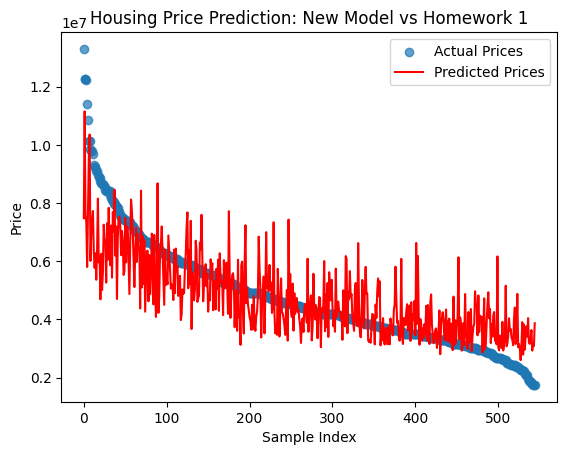

In [12]:
# Generate predictions for comparison
with torch.no_grad():
    y_pred_new = best_model(X_tensor)

# Visualize predictions
plt.scatter(range(len(y_tensor)), y_tensor, label="Actual Prices", alpha=0.7)
plt.plot(range(len(y_tensor)), y_pred_new, label="Predicted Prices", color="red")
plt.title("Housing Price Prediction: New Model vs Homework 1")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()


# Problem 3
Repeat all sections of problem 2, this time use all the input features from housing price dataset.

In [16]:
url = "https://raw.githubusercontent.com/Axel02leon/Intro-to-Machine-Learning-/refs/heads/main/Homework_2/Housing.csv"
df = pd.read_csv(url)

In [17]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

df[varlist] = df[varlist].apply(binary_map)

x_input = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + varlist
X = df[x_input].values
y = df['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [18]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = torch.nn.Linear(input_dim, 1)  # Single output for regression

    def forward(self, x):
        return self.linear(x)

# Loss function
def mse_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()


In [19]:
def train_model(model, X_train, y_train, X_val, y_val, epochs, learning_rate):
    optimizer = SGD(model.parameters(), lr=learning_rate)
    training_losses = []
    validation_losses = []

    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X_train)
        train_loss = mse_loss(y_pred, y_train)

        # Backpropagation
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Validation
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = mse_loss(y_val_pred, y_val)

        training_losses.append(train_loss.item())
        validation_losses.append(val_loss.item())

        # Print loss every 500 epochs
        if (epoch + 1) % 500 == 0:
            print(f"Epoch {epoch + 1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    return training_losses, validation_losses


In [20]:
# Train with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000

best_model = None
best_val_loss = float('inf')

for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    model = LinearRegressionModel(input_dim=X_train.shape[1])
    train_losses, val_losses = train_model(model, X_train, y_train, X_val, y_val, epochs, lr)

    # Compare validation loss
    final_val_loss = val_losses[-1]
    print(f"Final Validation Loss: {final_val_loss:.4f}")

    if final_val_loss < best_val_loss:
        best_val_loss = final_val_loss
        best_model = model



Training with Learning Rate: 0.1
Epoch 500, Training Loss: 992480985088.0000, Validation Loss: 1800794013696.0000
Epoch 1000, Training Loss: 992480985088.0000, Validation Loss: 1800794013696.0000
Epoch 1500, Training Loss: 992480985088.0000, Validation Loss: 1800794013696.0000
Epoch 2000, Training Loss: 992480985088.0000, Validation Loss: 1800794013696.0000
Epoch 2500, Training Loss: 992480985088.0000, Validation Loss: 1800794013696.0000
Epoch 3000, Training Loss: 992480985088.0000, Validation Loss: 1800794013696.0000
Epoch 3500, Training Loss: 992480985088.0000, Validation Loss: 1800794013696.0000
Epoch 4000, Training Loss: 992480985088.0000, Validation Loss: 1800794013696.0000
Epoch 4500, Training Loss: 992480985088.0000, Validation Loss: 1800794013696.0000
Epoch 5000, Training Loss: 992480985088.0000, Validation Loss: 1800794013696.0000
Final Validation Loss: 1800794013696.0000

Training with Learning Rate: 0.01
Epoch 500, Training Loss: 992489635840.0000, Validation Loss: 17998175

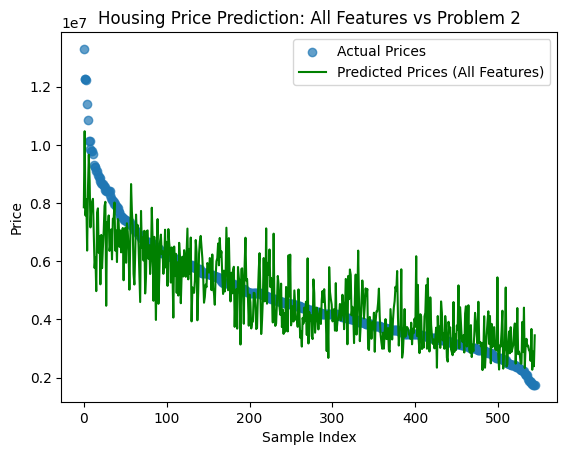

In [21]:
# Generate predictions for comparison
with torch.no_grad():
    y_pred_all_features = best_model(X_tensor)

# Visualize predictions
plt.scatter(range(len(y_tensor)), y_tensor, label="Actual Prices", alpha=0.7)
plt.plot(range(len(y_tensor)), y_pred_all_features, label="Predicted Prices (All Features)", color="green")
plt.title("Housing Price Prediction: All Features vs Problem 2")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()
